In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as oversampling
import imblearn.under_sampling as undersampling
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing

2023-04-25 19:27:01.537199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 19:27:01.737525: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 19:27:01.737995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 19:27:02.914445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Delay", axis=1)
Y_class = data_classification.Delay
# X_class, Y_class = undersampling.EditedNearestNeighbours(n_neighbors=5, n_jobs=-1).fit_resample(X_class, Y_class)
data_classification

,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,Route,Delay
0,3036,4.0,1195,131.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,315,7.0,707,145.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,6673,5.0,499,42.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,1
3,3668,2.0,810,70.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1
4,623,5.0,985,143.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397302,1533,3.0,415,150.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,334,0
397303,486,7.0,365,107.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1843,0
397304,3111,7.0,640,84.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3081,0
397305,623,1.0,1000,220.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,530,0


In [4]:
Y_class.isnull().sum()

0

In [5]:
scaler = preprocessing.StandardScaler()
X_class = pd.DataFrame(scaler.fit_transform(X_class), columns=X_class.columns)

In [6]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = selection.train_test_split(X_reg, Y_reg, test_size=0.2, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = selection.train_test_split(X_class, Y_class, test_size=0.2, stratify=Y_class, random_state=14)

X_class_train, Y_class_train = oversampling.SMOTE().fit_resample(X_class_train, Y_class_train)

In [7]:
X_class_train, X_class_test = X_class_train.astype(float), X_class_test.astype(float)

In [111]:
regression_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(22,)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(1, activation="linear")
    ]
)

In [10]:
regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [11]:
regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mae")

In [12]:
regression_model.fit(X_reg_train, Y_reg_train, epochs=15, verbose=True)

Epoch 1/15
1349/1349 [==============================] - 6s 3ms/step - loss: 1034.8759
Epoch 2/15
1349/1349 [==============================] - 4s 3ms/step - loss: 510.3505
Epoch 3/15
1349/1349 [==============================] - 4s 3ms/step - loss: 489.7083
Epoch 4/15
1349/1349 [==============================] - 4s 3ms/step - loss: 481.7732
Epoch 5/15
1349/1349 [==============================] - 4s 3ms/step - loss: 470.9188
Epoch 6/15
1349/1349 [==============================] - 4s 3ms/step - loss: 468.1762
Epoch 7/15
1349/1349 [==============================] - 4s 3ms/step - loss: 461.1234
Epoch 8/15
1349/1349 [==============================] - 4s 3ms/step - loss: 456.3058
Epoch 9/15
1349/1349 [==============================] - 4s 3ms/step - loss: 446.3820
Epoch 10/15
1349/1349 [==============================] - 4s 3ms/step - loss: 441.5458
Epoch 11/15
1349/1349 [==============================] - 4s 3ms/step - loss: 435.5243
Epoch 12/15
1349/1349 [==============================] - 4s 3m

In [13]:
regression_prediction = regression_model.predict(X_reg_test)

338/338 [==============================] - 0s 1ms/step


In [14]:
print(metrics.mean_absolute_error(Y_reg_test, regression_prediction))
print(metrics.mean_squared_error(Y_reg_test, regression_prediction))
print(metrics.r2_score(Y_reg_test, regression_prediction))
print(metrics.max_error(Y_reg_test, regression_prediction))

413.69172730408735
517040.44590558397
0.9676789712249824
10194.0849609375


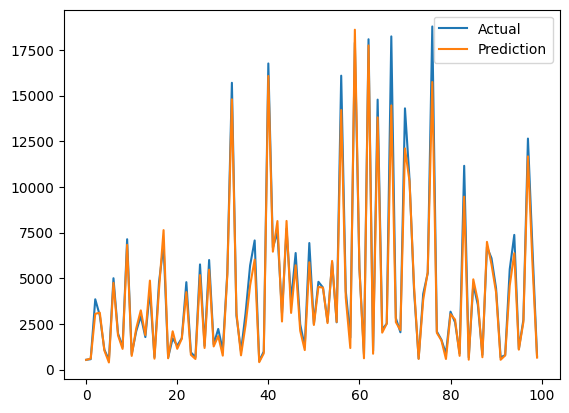

In [15]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(regression_prediction[:100], label="Prediction");
plt.legend();

In [9]:
Y_class_train.value_counts()

Delay
0    237676
1    237676
Name: count, dtype: int64

In [8]:
classification_model = tf.keras.models.load_model("./classification_model_2.keras")

In [10]:
classification_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(23,)),
        #tf.keras.layers.Dense(10000, activation="relu"),
        #tf.keras.layers.Dropout(0.1),
        #tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1024, activation="tanh"),
        tf.keras.layers.Dropout(0.1),
        #tf.keras.layers.Dense(128, activation="tanh"),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(512, activation="tanh"),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(128, activation="tanh"),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(32, activation="tanh"),
        tf.keras.layers.Dense(16, activation="tanh"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [11]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 1024)              263168    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               6

In [53]:
classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.BinaryCrossentropy())

In [64]:
classification_model.fit(X_class_train, Y_class_train, epochs=15, verbose=True, class_weight={0: 0.9, 1: 1})

Epoch 1/15
14855/14855 [==============================] - 116s 8ms/step - loss: 0.3376
Epoch 2/15
14855/14855 [==============================] - 112s 8ms/step - loss: 0.3371
Epoch 3/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3369
Epoch 4/15
14855/14855 [==============================] - 115s 8ms/step - loss: 0.3368
Epoch 5/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3361
Epoch 6/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3364
Epoch 7/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3355
Epoch 8/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3351
Epoch 9/15
14855/14855 [==============================] - 112s 8ms/step - loss: 0.3351
Epoch 10/15
14855/14855 [==============================] - 113s 8ms/step - loss: 0.3358
Epoch 11/15
14855/14855 [==============================] - 115s 8ms/step - loss: 0.3353
Epoch 12/15
14855/14855 [================

In [65]:
classification_prediction: np.ndarray = classification_model.predict(X_class_test)
classification_prediction

2484/2484 [==============================] - 5s 2ms/step


array([[1.0959892e-01],
       [2.2272597e-04],
       [2.9973775e-02],
       ...,
       [1.4564978e-03],
       [8.4833258e-01],
       [4.9457587e-03]], dtype=float32)

In [66]:
classification_prediction = classification_prediction.round()
classification_prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [67]:
print(metrics.classification_report(Y_class_test, classification_prediction))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     59420
           1       0.34      0.48      0.40     20042

    accuracy                           0.63     79462
   macro avg       0.57      0.58      0.57     79462
weighted avg       0.68      0.63      0.65     79462



In [31]:
from abc import ABCMeta, abstractmethod
from typing import *
from typing_extensions import Self
from numpy.typing import NDArray


class _ActivationFunction(metaclass=ABCMeta):
    '''Abstract class that should contain functions for forward and backward propagation.'''

    @staticmethod
    @abstractmethod
    def forward(X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @staticmethod
    @abstractmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        raise NotImplementedError

class Sigmoid(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return 1 / (1 + np.exp(-X))
    
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        sigmoid = 1 / (1 + np.exp(-X))
        return dX_previous * sigmoid * (1 - sigmoid)

class Linear(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return X
    
    @staticmethod
    def backward(X: NDArray) -> NDArray:
        raise NotImplementedError

class Tanh(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.tanh(X)
    
    @staticmethod
    def backward(X: NDArray) -> NDArray:
        raise NotImplementedError

class Relu(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.maximum(0, X)
        #return np.array([[value if value > 0 else 0 for value in row] for row in X])
    
    @staticmethod
    def backward(X: NDArray) -> NDArray:
        raise NotImplementedError
    
class Softmax(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        exp_ = np.exp(X)
        sum_ = np.sum(exp_, axis=1).reshape(-1, 1)
        return exp_ / sum_
    
    @staticmethod
    def backward(X: NDArray) -> NDArray:
        raise NotImplementedError

class _PerceptronLayer(metaclass=ABCMeta):
    '''Abstract class for a perceptron layer'''
    def __init__(self, units_number: int, previous_layer: Optional[Self] = None, next_layer: Optional[Self] = None) -> None:
        self.units_number: Final[int] = units_number
        self.previous_layer = previous_layer
        self.next_layer = next_layer

    @abstractmethod
    def forward_propagation(self, X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @abstractmethod
    def backward_propagation(self, X: NDArray, ) -> NDArray:
        raise NotImplementedError

class InputLayer(_PerceptronLayer):
    def __init__(self, units_number: int, next_layer: Optional[Self] = None) -> None:
        super().__init__(units_number, None, next_layer)
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        return X
    
    def backward_propagation(self, X: NDArray) -> NDArray:
        return X

class Dense(_PerceptronLayer):
    def __init__(self, func: _ActivationFunction, units_number: int, previous_layer: Optional[Self] = None, next_layer: Optional[Self] = None) -> None:
        super().__init__(units_number, previous_layer, next_layer)
        self.function = func
        self.weights = np.zeros((units_number, 1), dtype=float)
        self.bias = np.zeros((units_number, 1), dtype=float)
        self.X_prev: Optional[NDArray] = None
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        self.X_prev = X
        A: NDArray = self.weights.dot(X) + self.bias
        return self.function.forward(A)
    
    def backward_propagation(self, X: NDArray, dX_previous: NDArray) -> NDArray: #?
        m = self.X_prev.shape[1]
        dX_previous = self.function.backward(X, dX_previous)
        d_weights = dX_previous.dot(self.X_prev.T) / m #?
        d_bias = np.sum(dX_previous, axis=1) / m
        raise NotImplementedError
        return (dX_previous, d_weights, d_bias)
    
    def update_parameters(self, d_weights: NDArray, d_bias: NDArray, learning_rate: float) -> None:
        self.weights -= d_weights * learning_rate
        self.bias -= d_bias * learning_rate